In [98]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
LSOAs_OAs = pd.read_csv('Data/LSOAs_OAs.csv')

### The change of IMD (2010, 2015, 2019)

In [34]:
IMD_2010 = pd.read_excel('Data/IMD/IMD_2010.xlsx', sheet_name = 'IMD 2010')
IMD_2015 = pd.read_excel('Data/IMD/IMD_2015.xlsx', sheet_name = 'ID2015 Scores')
IMD_2019 = pd.read_excel('Data/IMD/IoD_2019.xlsx', sheet_name = 'IoD2019 Scores')

In [28]:
IMD_2010

,LSOA CODE,LA CODE,LA NAME,GOR CODE,GOR NAME,IMD SCORE,RANK OF IMD SCORE (where 1 is most deprived)
0,E01000001,00AA,City of London,H,London,6.161637,28814
1,E01000002,00AA,City of London,H,London,5.585054,29450
2,E01000003,00AA,City of London,H,London,13.292920,20047
3,E01000004,00AA,City of London,H,London,11.171350,22503
4,E01000005,00AA,City of London,H,London,21.364660,12978
...,...,...,...,...,...,...,...
32477,E01032478,47UG,Wyre Forest District,F,West Midlands,28.128800,9056
32478,E01032479,47UG,Wyre Forest District,F,West Midlands,18.741510,14977
32479,E01032480,47UG,Wyre Forest District,F,West Midlands,13.514220,19783
32480,E01032481,47UG,Wyre Forest District,F,West Midlands,31.419580,7592


In [35]:
IMD_2010 = IMD_2010[IMD_2010['LSOA CODE'].isin(LSOAs_OAs['LSOA11CD'])]
IMD_2015 = IMD_2015[IMD_2015['LSOA code (2011)'].isin(LSOAs_OAs['LSOA11CD'])]
IMD_2019 = IMD_2019[IMD_2019['LSOA code (2011)'].isin(LSOAs_OAs['LSOA11CD'])]

In [36]:
IMD_2010 = IMD_2010[['LSOA CODE', 'IMD SCORE']].rename(columns={'IMD SCORE': 'IMD_2010'})
IMD_2015 = IMD_2015[['LSOA code (2011)','Index of Multiple Deprivation (IMD) Score']].rename(columns={'LSOA code (2011)':'LSOA CODE',
                                                                                                       'Index of Multiple Deprivation (IMD) Score': 'IMD_2015'})
IMD_2019 = IMD_2019[['LSOA code (2011)','Index of Multiple Deprivation (IMD) Score']].rename(columns={'LSOA code (2011)':'LSOA CODE',
                                                                                                       'Index of Multiple Deprivation (IMD) Score': 'IMD_2019'})

In [37]:
IMD = IMD_2010.merge(IMD_2015, how = 'right')
IMD = IMD.merge(IMD_2019)

In [38]:
IMD

,LSOA CODE,IMD_2010,IMD_2015,IMD_2019
0,E01009417,13.946150,11.609,12.652
1,E01009418,17.485520,19.502,19.086
2,E01009419,14.816700,15.603,17.512
3,E01009433,9.716425,5.759,5.935
4,E01009415,3.830449,4.608,6.040
...,...,...,...,...
1736,E01010430,40.295860,44.707,43.265
1737,E01010433,46.548680,52.830,46.113
1738,E01010453,46.294740,48.485,40.812
1739,E01010454,44.009110,45.204,37.888


In [39]:
IMD['change_2010_2015'] = IMD['IMD_2015'] - IMD['IMD_2010']
IMD['change_2015_2019'] = IMD['IMD_2019'] - IMD['IMD_2015']
IMD['change_2010_2019'] = IMD['IMD_2019'] - IMD['IMD_2010']

In [41]:
IMD['percent_change_2010_2015'] = (IMD['change_2010_2015'] / IMD['IMD_2010']) * 100
IMD['percent_change_2015_2019'] = (IMD['change_2015_2019'] / IMD['IMD_2015']) * 100
IMD['percent_change_2010_2019'] = (IMD['change_2010_2019'] / IMD['IMD_2010']) * 100


In [42]:
IMD

,LSOA CODE,IMD_2010,IMD_2015,IMD_2019,change_2010_2015,change_2015_2019,change_2010_2019,percent_change_2010_2015,percent_change_2015_2019,percent_change_2010_2019
0,E01009417,13.946150,11.609,12.652,-2.337150,1.043,-1.294150,-16.758389,8.984409,-9.279622
1,E01009418,17.485520,19.502,19.086,2.016480,-0.416,1.600480,11.532285,-2.133115,9.153174
2,E01009419,14.816700,15.603,17.512,0.786300,1.909,2.695300,5.306850,12.234827,18.190960
3,E01009433,9.716425,5.759,5.935,-3.957425,0.176,-3.781425,-40.729229,3.056086,-38.917863
4,E01009415,3.830449,4.608,6.040,0.777551,1.432,2.209551,20.299213,31.076389,57.683864
...,...,...,...,...,...,...,...,...,...,...
1736,E01010430,40.295860,44.707,43.265,4.411140,-1.442,2.969140,10.946881,-3.225446,7.368350
1737,E01010433,46.548680,52.830,46.113,6.281320,-6.717,-0.435680,13.494088,-12.714367,-0.935966
1738,E01010453,46.294740,48.485,40.812,2.190260,-7.673,-5.482740,4.731121,-15.825513,-11.843117
1739,E01010454,44.009110,45.204,37.888,1.194890,-7.316,-6.121110,2.715097,-16.184408,-13.908734


In [135]:
IMD_stats = IMD[['IMD_2010', 'IMD_2015', 'IMD_2019']].agg(['mean', 'median'])
IMD_stats

,IMD_2010,IMD_2015,IMD_2019
mean,30.862521,30.608442,30.673972
median,29.199570,28.810000,29.038000


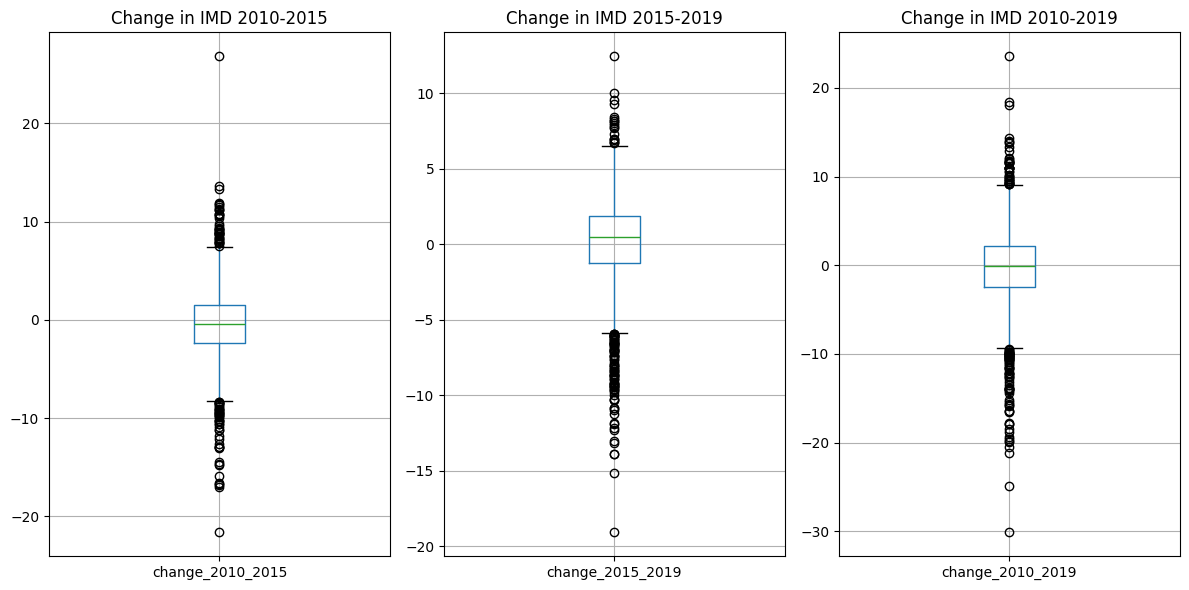

In [46]:
plt.figure(figsize=(12, 6))

# box plot the absolute changes between years
plt.subplot(1, 3, 1)
IMD.boxplot(column=['change_2010_2015'])
plt.title('Change in IMD 2010-2015')

plt.subplot(1, 3, 2)
IMD.boxplot(column=['change_2015_2019'])
plt.title('Change in IMD 2015-2019')

plt.subplot(1, 3, 3)
IMD.boxplot(column=['change_2010_2019'])
plt.title('Change in IMD 2010-2019')

plt.tight_layout()
plt.show()


### The change of population (2009-2020)

In [79]:
pop_2010 = pd.read_excel('Data/population/census_OA_2002_2012.xlsx', sheet_name = 'west_mids_2010')
# pop_2010 = pd.read_excel('Data/population/census_OA_2002_2012.xlsx', sheet_name = 'west_mids_2010')
# pop_2011 = pd.read_excel('Data/population/census_OA_2002_2012.xlsx', sheet_name = 'west_mids_2011')
# pop_2012 = pd.read_excel('Data/population/census_OA_2002_2012.xlsx', sheet_name = 'west_mids_2012')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [72]:
pop_2015 = pd.read_excel('Data/population/census_OA_2015.xlsx', sheet_name = 'Mid-2015 Persons', skiprows = 4)

In [73]:
pop_2020 = pd.read_excel('Data/population/census_OA_2020.xlsx', sheet_name = 'Mid-2020 Persons', skiprows = 4)

In [83]:
pop_2010 = pop_2010[pop_2010['OA11CD'].isin(LSOAs_OAs['OA11CD'])]
pop_2015 = pop_2015[pop_2015['OA11CD'].isin(LSOAs_OAs['OA11CD'])]
pop_2020 = pop_2020[pop_2020['OA11CD'].isin(LSOAs_OAs['OA11CD'])]

In [75]:
def process_dataframe(df):
    df['below_14'] = df.loc[:, 0:14].sum(axis=1)
    df['above_65'] = df.loc[:, 65:'90+'].sum(axis=1)
    df = df[['OA11CD', 'below_14', 'above_65']]
    return df

In [80]:
pop_2010 = process_dataframe(pop_2010)
pop_2015 = process_dataframe(pop_2015)
pop_2020 = process_dataframe(pop_2020)

In [84]:
pop_2010 = pop_2010.groupby('OA11CD').sum().reset_index()

In [85]:
pop_2010

,OA11CD,below_14,above_65
0,E00045077,83,13
1,E00045078,84,26
2,E00045079,25,56
3,E00045080,98,61
4,E00045081,35,83
...,...,...,...
8788,E00175799,49,49
8789,E00175800,15,19
8790,E00175801,27,26
8791,E00175802,4,9


In [86]:
pop_2010 = pop_2010.rename(columns={'below_14': 'below_14_2010', 'above_65': 'above_65_2010'})
pop_2015 = pop_2015.rename(columns={'below_14': 'below_14_2015', 'above_65': 'above_65_2015'})
pop_2020 = pop_2020.rename(columns={'below_14': 'below_14_2020', 'above_65': 'above_65_2020'})

In [87]:
below_14 = pop_2010[['OA11CD', 'below_14_2010']].merge(
    pop_2015[['OA11CD', 'below_14_2015']]
).merge(
    pop_2020[['OA11CD', 'below_14_2020']]
)

In [89]:
above_65 = pop_2010[['OA11CD', 'above_65_2010']].merge(
    pop_2015[['OA11CD', 'above_65_2015']]
).merge(
    pop_2020[['OA11CD', 'above_65_2020']]
)

In [92]:
below_14['change_2010_2015'] = below_14['below_14_2015'] - below_14['below_14_2010']
below_14['change_2015_2020'] = below_14['below_14_2020'] - below_14['below_14_2015']
below_14['change_2010_2020'] = below_14['below_14_2020'] - below_14['below_14_2010']

In [133]:
below_14_stats = below_14[['below_14_2010', 'below_14_2015', 'below_14_2020']].agg(['mean', 'median'])
below_14_stats

,below_14_2010,below_14_2015,below_14_2020
mean,62.864779,66.466735,69.307631
median,58.000000,60.000000,62.000000


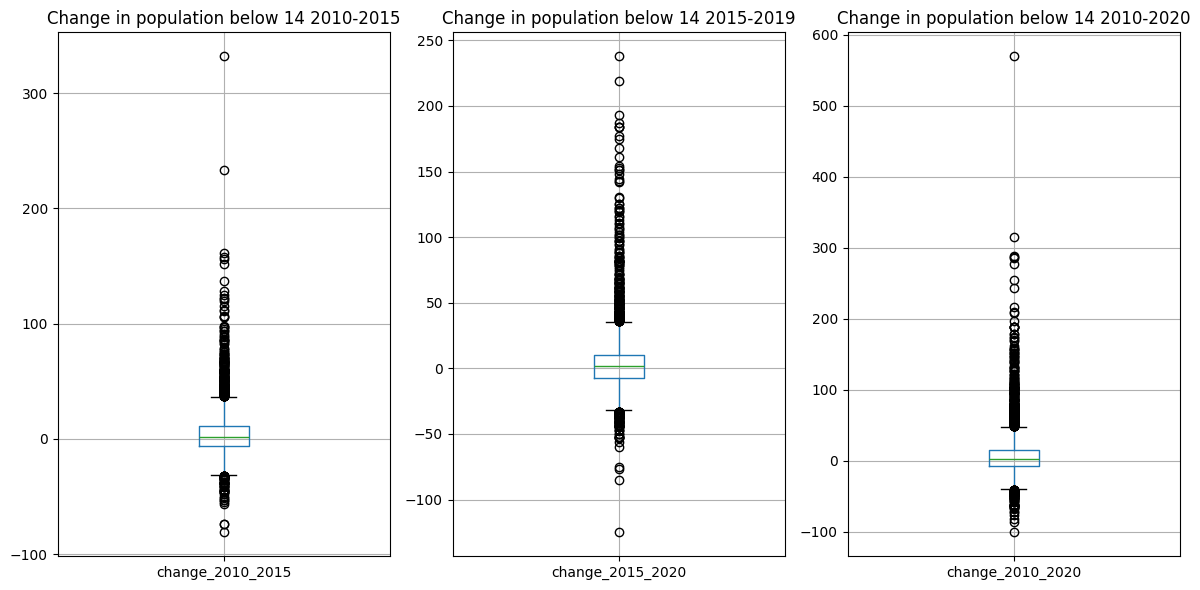

In [96]:
plt.figure(figsize=(12, 6))

# Box plot the changes of population below 14
plt.subplot(1, 3, 1)
below_14.boxplot(column=['change_2010_2015'])
plt.title('Change in population below 14 2010-2015')

plt.subplot(1, 3, 2)
below_14.boxplot(column=['change_2015_2020'])
plt.title('Change in population below 14 2015-2019')

plt.subplot(1, 3, 3)
below_14.boxplot(column=['change_2010_2020'])
plt.title('Change in population below 14 2010-2020')

plt.tight_layout()
plt.show()

In [94]:
above_65['change_2010_2015'] = above_65['above_65_2015'] - above_65['above_65_2010']
above_65['change_2015_2020'] = above_65['above_65_2020'] - above_65['above_65_2015']
above_65['change_2010_2020'] = above_65['above_65_2020'] - above_65['above_65_2010']

In [134]:
above_65_stats = above_65[['above_65_2010', 'above_65_2015', 'above_65_2020']].agg(['mean', 'median'])
above_65_stats

,above_65_2010,above_65_2015,above_65_2020
mean,49.486296,53.041283,54.630047
median,47.000000,49.000000,50.000000


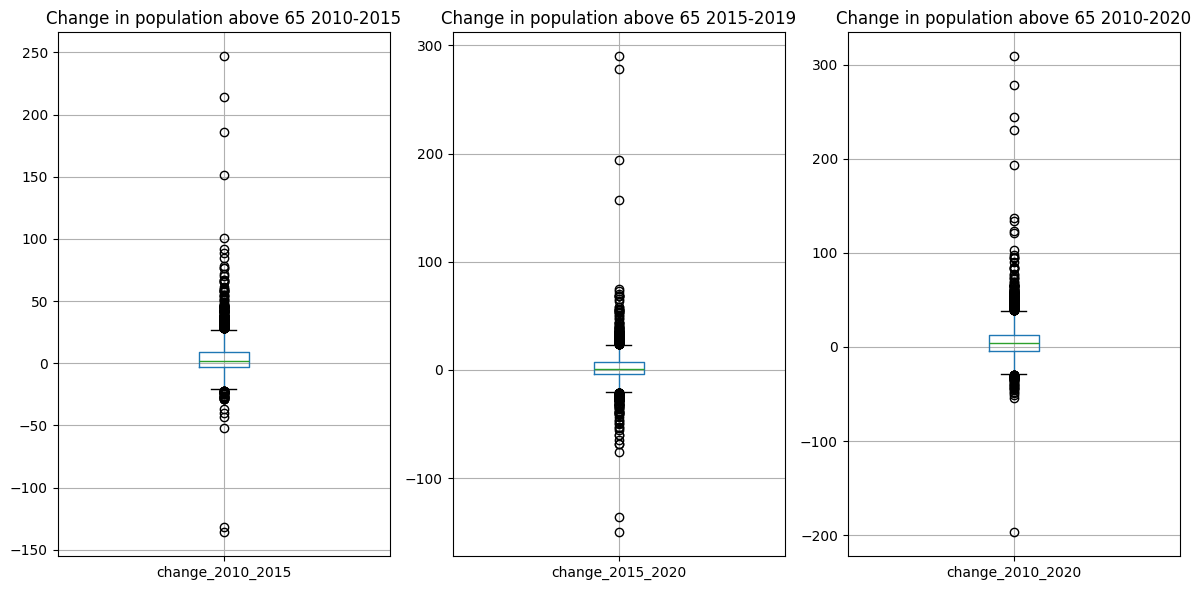

In [95]:
plt.figure(figsize=(12, 6))

# Box plot the changes of population above 65
plt.subplot(1, 3, 1)
above_65.boxplot(column=['change_2010_2015'])
plt.title('Change in population above 65 2010-2015')

plt.subplot(1, 3, 2)
above_65.boxplot(column=['change_2015_2020'])
plt.title('Change in population above 65 2015-2019')

plt.subplot(1, 3, 3)
above_65.boxplot(column=['change_2010_2020'])
plt.title('Change in population above 65 2010-2020')

plt.tight_layout()
plt.show()

### The change of land cover

In [121]:
land_use_2012 = gpd.read_file('Data/land_cover/corine_clip/U2018_CLC2012_V2020_20u1.shp')
land_use_2018 = gpd.read_file('Data/land_cover/corine_NUT/U2018_CLC2018_V2020_20u1.shp')

land_use_2012 = land_use_2012.to_crs('EPSG:27700')
land_use_2018 = land_use_2018.to_crs('EPSG:27700')

land_use_2012 = land_use_2012.drop_duplicates()
land_use_2018 = land_use_2018.drop_duplicates()

In [122]:
corine_label = pd.read_excel('Data/land_cover/corine_clip/corine_label.xlsx')

In [123]:
corine_label['CLC_CODE'] = corine_label['CLC_CODE'].astype(str)

land_use_2012['Code_12'] = land_use_2012['Code_12'].astype(str)
land_use_2018['Code_18'] = land_use_2018['Code_18'].astype(str)

land_use_2012 = land_use_2012.merge(corine_label, left_on = 'Code_12', right_on = 'CLC_CODE', how='left')
land_use_2018 = land_use_2018.merge(corine_label, left_on = 'Code_18', right_on = 'CLC_CODE', how='left')

In [124]:
land_use_2012 = land_use_2012[['geometry', 'LABEL2']].rename(columns={'LABEL2': 'land_cover_2012'})
land_use_2018 = land_use_2018[['geometry', 'LABEL2']].rename(columns={'LABEL2': 'land_cover_2018'})

In [125]:
intersection = gpd.overlay(land_use_2012, land_use_2018, how='intersection')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/var/folders/rv/j_vzprd56j5fpq5_0hvsy8v80000gn/T/ipykernel_30748/2313828933.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1420 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection = gpd.overlay(land_use_2012, land_use_2018, how='intersection')


In [126]:
intersection

,land_cover_2012,land_cover_2018,geometry
0,Urban fabric,Urban fabric,"MULTIPOLYGON (((433908.680 280334.924, 433908...."
1,Urban fabric,Urban fabric,"POLYGON ((435369.634 284486.449, 435487.824 28..."
2,"Industrial, commercial and transport units",Urban fabric,"POLYGON ((435945.220 277509.571, 435379.759 27..."
3,"Industrial, commercial and transport units",Urban fabric,"POLYGON ((434497.643 280377.772, 434316.430 28..."
4,"Industrial, commercial and transport units",Urban fabric,"POLYGON ((434075.069 283792.702, 434075.069 28..."
...,...,...,...
617,Forests,Forests,"MULTIPOLYGON (((425428.781 284157.120, 425500...."
618,Forests,Forests,"POLYGON ((425512.766 284649.674, 425512.766 28..."
619,Arable land,Forests,"MULTIPOLYGON (((425407.601 284190.878, 425428...."
620,Forests,Forests,"POLYGON ((425563.578 284594.857, 425512.766 28..."


In [127]:
intersection['land_cover_change'] = intersection['land_cover_2012'] != intersection['land_cover_2018']
land_cover = intersection[['geometry', 'land_cover_2012', 'land_cover_2018', 'land_cover_change']]

In [128]:
land_cover

,geometry,land_cover_2012,land_cover_2018,land_cover_change
0,"MULTIPOLYGON (((433908.680 280334.924, 433908....",Urban fabric,Urban fabric,False
1,"POLYGON ((435369.634 284486.449, 435487.824 28...",Urban fabric,Urban fabric,False
2,"POLYGON ((435945.220 277509.571, 435379.759 27...","Industrial, commercial and transport units",Urban fabric,True
3,"POLYGON ((434497.643 280377.772, 434316.430 28...","Industrial, commercial and transport units",Urban fabric,True
4,"POLYGON ((434075.069 283792.702, 434075.069 28...","Industrial, commercial and transport units",Urban fabric,True
...,...,...,...,...
617,"MULTIPOLYGON (((425428.781 284157.120, 425500....",Forests,Forests,False
618,"POLYGON ((425512.766 284649.674, 425512.766 28...",Forests,Forests,False
619,"MULTIPOLYGON (((425407.601 284190.878, 425428....",Arable land,Forests,True
620,"POLYGON ((425563.578 284594.857, 425512.766 28...",Forests,Forests,False


In [129]:
intersection['area'] = intersection.geometry.area

# total area of the West Midlands
total_area = intersection['area'].sum()

# the changed area
changed_area = intersection[intersection['land_cover_change']]['area'].sum()

# the ratio of the change
change_ratio = changed_area / total_area

In [130]:
changed_area

5608204.6333138365

In [131]:
change_ratio

0.006220941406664478